# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

#### Change current working directory to project folder. [ Score: 2 points ]

In [1]:
#### Add your code here ####
data_path = "/home/lenovo/Documents/Personal_Data/AI_And_ML/Projects/Computer Vision week7/"

#### Extract the zip file [ Score: 2 points ]
- Extract Aligned Face Dataset from Pinterest.zip

In [2]:
#### Add your code here #### 
images_zip_path = data_path + "Part 3 - Aligned Face Dataset from Pinterest.zip"

from zipfile import ZipFile

with ZipFile(images_zip_path, 'r') as z:
  z.extractall()

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')


In [4]:
print(metadata[0])

PINS/pins_david mazouz/david mazouz81.jpg


### Define function to load image
- Define a function to load image from the metadata

In [5]:
import cv2
def load_image(path):
    img = cv2.imread(path,1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image [ Score: 2 points ]
- Load one image using the function "load_image"

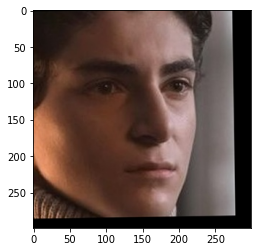

In [6]:
#### Add your code here ####
path = metadata[0].image_path()
image = load_image(path)
fig,ax = plt.subplots(1)
ax.imshow(image)
plt.show()

In [7]:
for i, m in enumerate(metadata):
    imgpath = metadata[i].image_path()
    img = load_image(imgpath)
    

In [87]:
import glob

paths = glob.glob("pins/PINS/*")
label_names = [os.path.split(x)[1] for x in paths]

print("Total labels: {}".format(len(label_names)))
print("Labels: {}".format((label_names)))

Total labels: 100
Labels: ['pins_david mazouz', 'pins_Chris Evans', 'pins_Emilia Clarke', 'pins_Mark Ruffalo', 'pins_Pedro Alonso', 'pins_Natalie Portman ', 'pins_Wentworth Miller', 'pins_gal gadot face', 'pins_shakira', 'pins_mark zuckerberg', 'pins_kiernan shipka ', 'pins_Peter Dinklage', 'pins_Dave Franco', 'pins_Kit Harington', 'pins_Benedict Cumberbatch', 'pins_jason isaacs', 'pins_Jesse Eisenberg', 'pins_Cameron Monaghan', 'pins_Melissa benoit', 'pins_bill gates', 'pins_Alvaro Morte', 'pins_elizabeth olsen face', 'pins_elon musk', 'pins_Amanda Crew', 'pins_Emma Stone', 'pins_Bryan Cranston', 'pins_taylor swift', 'pins_eliza taylor', 'pins_Paul Rudd', 'pins_chadwick boseman face', 'pins_Dwayne Johnson', 'pins_Betsy Brandt', 'pins_Danielle Panabaker', 'pins_Morena Baccarin', 'pins_Thomas Middleditch', 'pins_lindsey morgan face', 'pins_Mike Colter', 'pins_barbara palvin face', 'pins_grant gustin face', 'pins_tom holland face', 'pins_Emily Bett Rickards', 'pins_Robert Knepper', 'pins

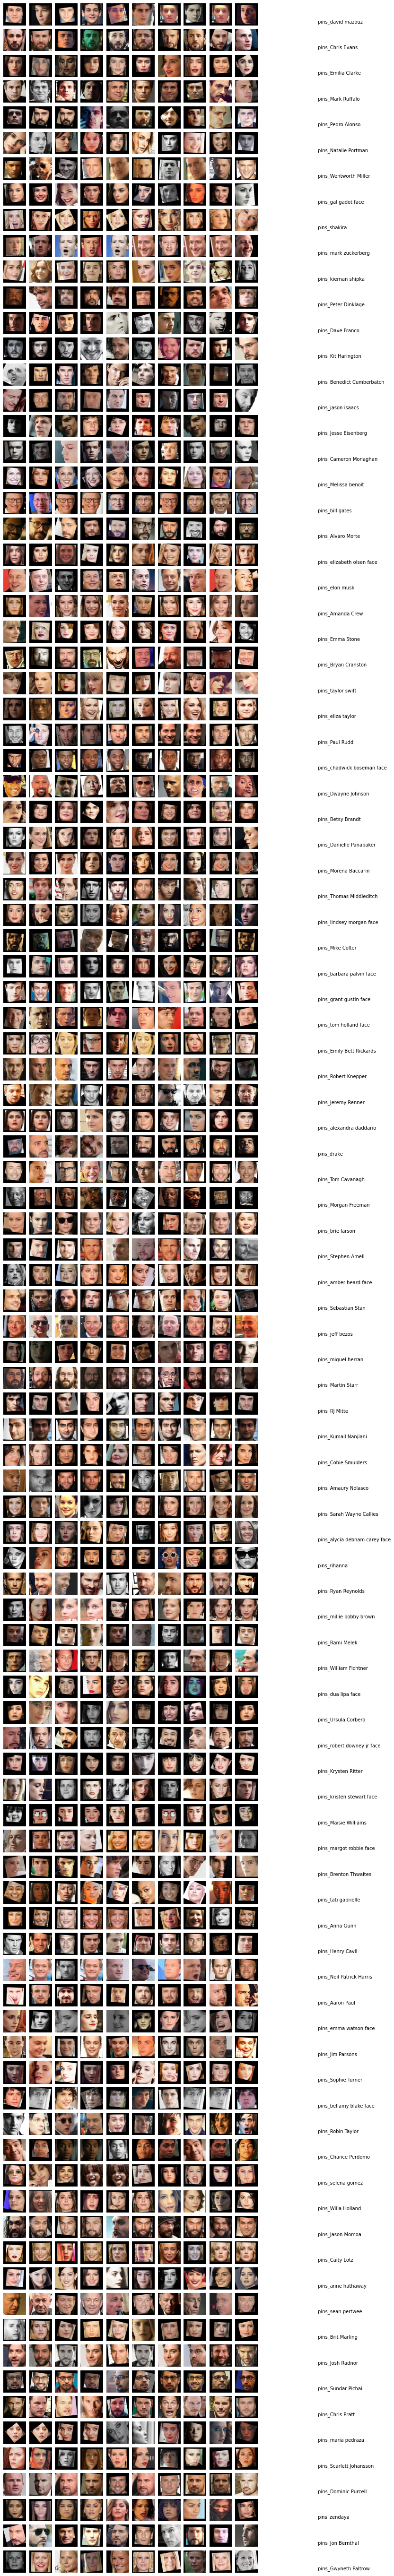

In [89]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(1, (300, 100))
grid = ImageGrid(fig, 111, nrows_ncols=(100, 10), axes_pad=0.1)

n_img_class = []
counter = 0
for idx, label in enumerate(label_names):
    paths = glob.glob(os.path.join("pins/PINS", label, "*.jpg"))
    n_img_class.append([label, len(paths)])
    perm = np.random.choice(len(paths), size=10)

    title = True
    for ii in perm:
        ax = grid[counter]
        if title:
            ax.text(1800, 105, label, verticalalignment="center")
            title = False
        img1 = cv2.imread(paths[ii])
        img1 = cv2.resize(img1, (128,128))
        ax.axis("off")
        ax.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
        counter += 1
        
plt.show()

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

2021-12-01 10:39:14.979566: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory
2021-12-01 10:39:14.979710: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory
2021-12-01 10:39:14.979724: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


#### Load the model [ Score: 2 points ]
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [9]:
model = vgg_face()#### Add your code here ####
model.load_weights('Part 3 - vgg_face_weights.h5')
#### Add your code here ####

2021-12-01 10:39:23.664003: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-12-01 10:39:23.752249: E tensorflow/stream_executor/cuda/cuda_driver.cc:351] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2021-12-01 10:39:23.752352: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lenovo-Lenovo-ideapad-520-15IKB): /proc/driver/nvidia/version does not exist
2021-12-01 10:39:23.754265: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-12-01 10:39:23.985931: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 1800000000 Hz
2021-12-01 10:39:23.987185: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5587a710cfe0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-12-01 10:39

### Get vgg_face_descriptor

In [10]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [11]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


#### Generate embeddings for all images  [ Score: 3 points ]
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [12]:
embeddings = np.zeros((metadata.shape[0], 2622))
embeddings.shape

(10770, 2622)

In [77]:


for i, m in enumerate(metadata):
  #### Add your code here ####
     #embeddings[i]=
    img = load_image(m.image_path())

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
    img = (img / 255.).astype(np.float32)

    img = cv2.resize(img, dsize = (224,224))
    
    embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
# All training images in this list

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [78]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

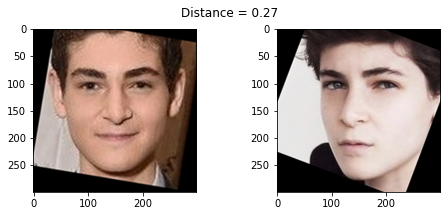

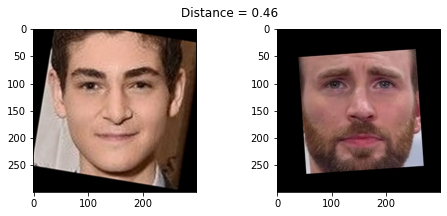

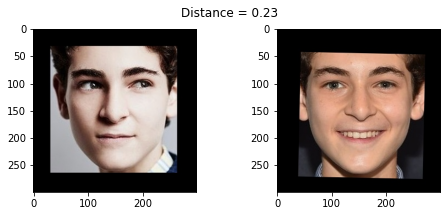

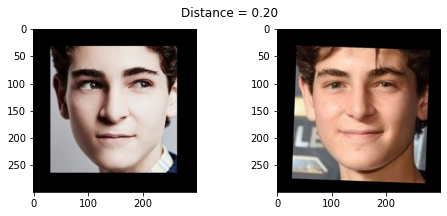

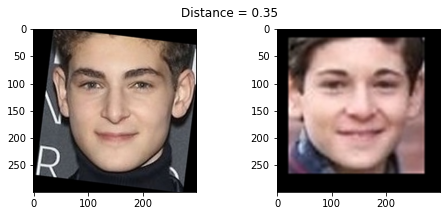

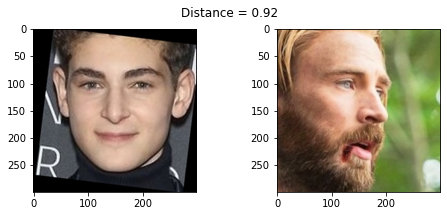

In [79]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)
show_pair(30, 31)
show_pair(30, 10)
show_pair(70,72)
show_pair(70, 115)

#### Create train and test sets [ Score: 2 points ]
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [80]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
X_test = embeddings[test_idx]
#### Add your code here ####

targets = np.array([m.name for m in metadata])
#train labels
y_train = targets[train_idx]
#test labels
y_test = targets[test_idx]
#### Add your code here ####

#### Encode the Labels  [ Score: 2 points ]
- Encode the targets
- Use LabelEncoder

In [81]:
from sklearn.preprocessing import LabelEncoder

#### Add your code here ####

encoder = LabelEncoder()

# Numerical encoding 
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)


In [82]:
print(y_train.shape)
print(y_test.shape)

(9573,)
(1197,)


#### Standardize the feature values [ Score: 2 points ]
- Scale the features using StandardScaler

In [83]:
# Standarize features
from sklearn.preprocessing import StandardScaler

#### Add your code here ####
scaler = StandardScaler()
 
# To scale data
Scaled_X_train=scaler.fit_transform(X_train)
Scaled_X_test= scaler.fit_transform(X_test)

#### Reduce dimensions using PCA (3 marks)
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [84]:
from sklearn.decomposition import PCA

#### Add your code here ####
n_components = 128
 
pca = PCA(n_components = n_components, svd_solver ='randomized',
          whiten = True).fit(Scaled_X_train)
 

pca_X_train = pca.transform(Scaled_X_train)
pca_X_test = pca.transform(Scaled_X_test)

print("Sample Data point after applying PCA\n", pca_X_train[0])
print("Dimesnsions of training set = % s and Test Set = % s"%(
        Scaled_X_train.shape, Scaled_X_test.shape))

Sample Data point after applying PCA
 [-0.00768446  1.67759078 -1.53774048 -0.87153007  1.31402935  2.35288936
  1.55667351  1.04521957  0.65231551  0.84823885  2.08204478 -0.09070028
  0.749692    1.16413958  3.38060052 -0.97267094  0.96433184 -1.62346985
  1.75715569  1.13993456  0.78341291  2.60208698 -0.38514007  0.33159204
  1.81105348  0.04038017 -0.80159074 -0.87223498 -0.04776846  2.17734148
 -1.68826068 -0.01396114 -0.78585497 -0.94701853  0.96326387 -1.22495221
 -0.09543465  3.80292844 -1.11470666 -1.6154755  -0.25743289  1.42593593
 -0.12930106 -0.25274159 -2.17437859 -0.54219251 -1.77405113 -1.48484344
  0.27865013 -0.11662157  0.42218579  0.95511113  0.23121582 -1.45886595
  3.23143824 -0.83763914  1.46517257  1.68984186 -1.887646    0.2646556
 -0.71269858  1.48662014  0.0778087   1.21440515  1.17692578  0.20650578
 -0.74271409 -2.29983267 -0.56436872  0.74057191 -0.88961405 -1.22472663
  1.43193653 -1.17095099 -1.32122824  1.68646862  0.81817198 -1.55634122
 -0.78026566  

#### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [91]:
from sklearn.svm import SVC

#### Add your code here ####
svc = SVC(kernel='rbf', class_weight=None , C=10000000, gamma='auto')

svc.fit(pca_X_train, y_train)

acc_svc = svc.score(pca_X_test, y_test)

print(f'SVM accuracy = {acc_svc}')


SVM accuracy = 0.9598997493734336


#### Test results (2 marks)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

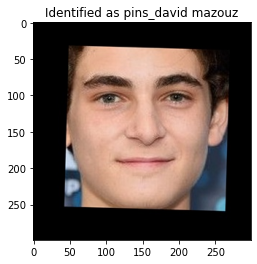

In [86]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = svc.predict([pca_X_test[example_idx]])
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

Label Encoding the target variables, standardizing the features and reducing dimensions using PCA.
SVM classifier to predict the celebrity with 95.98% accuracy.
Squared L2 distance was used to calculate the distance between 2 pairs of images.